In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random


# read Data_Normal.txt


In [4]:
data=pd.read_csv("./Data_Normal.txt",sep=";",header=0,names=['Height','Weight','Male'] )
data.insert(0,"Bayas",1)
data.head()


,Bayas,Height,Weight,Male
0,1,151.765,47.825606,1
1,1,139.700,36.485807,0
2,1,136.525,31.864838,0
3,1,156.845,53.041914,1
4,1,145.415,41.276872,0


# read Data_With_Outlier.txt

In [5]:
data_outlier=pd.read_csv("./Data_With_Outlier.txt",sep=";",header=0,names=['Height','Weight','Male'] )
data_outlier.insert(0,"Bayas",1)
data_outlier.head()

,Bayas,Height,Weight,Male
0,1,151.765,47.825606,1
1,1,139.700,36.485807,0
2,1,136.525,31.864838,0
3,1,156.845,53.041914,1
4,1,145.415,41.276872,0


#   normalaize the dataset



In [10]:
#normalized the first dataset :................................................
height_min=data.Height.min()
height_max=data.Height.max()
weight_min=data.Weight.min()
weight_max=data.Weight.max()
def normalize_1(row):
    row.Height= (row.Height - height_min)/(height_max-height_min)
    row.Weight= (row.Weight - weight_min)/(weight_max -weight_min)    
    return row

Normal_data=data.apply(normalize_1,axis='columns')  

#normalized the second dataset :................................................

height_min_2=data_outlier.Height.min()
height_max_2=data_outlier.Height.max()
weight_min_2=data_outlier.Weight.min()
weight_max_2=data_outlier.Weight.max()
def normalize_2(row):
    row.Height= (row.Height - height_min_2)/(height_max_2 - height_min_2)
    row.Weight= (row.Weight - weight_min_2)/(weight_max_2 - weight_min_2)     
    return row

Normal_data_outlier =data_outlier.apply(normalize_2,axis='columns')

  
#Normal_data.describe()
#Normal_data_outlier.describe()
        


# Implement  Regression Algorithm ::

### In this class , I used two method for implement stochastic gradient descent and batch gradient descent that I denominated them as Fit and Fit_STC 


In [11]:
class Linear_Regression_EGD:
    def __init__(self,x,y):
        self.X=x
        self.Y=y
        self.M=len(y)
        self.Weights=np.zeros((2,1))
#weight 2*1
        
    def Fit(self,epochs,Learning_rate):
        for i in range(epochs):
            y_predicted=self.X@self.Weights   #y_predicted  60*2 @ 2*1 : 60*1
            d_w=(1/self.M)*(self.X.T@(y_predicted-self.Y)) # 2*60 @ 60*1 : 2*1
            self.Weights=self.Weights-Learning_rate*d_w
            
    def Fit_STC(self,epochs,Learning_rate):        
        for i in range(epochs):                      
            for j in range(self.M):                 
                y_predicted=self.X[j].reshape((1,2))@self.Weights # 1*2 @ 2*1 : 1*1      
                L=y_predicted-self.Y[j].reshape((-1,1))                 
                d_w=(1/self.M)*(self.X[j].T.reshape((2,1))@(L))  # 2*1 @ 1*1:2*1
                self.Weights=self.Weights-Learning_rate*d_w
    
    def Fit_Batch(self,epochs,Learning_rate):
        for i in range(epochs):
            y_predicted=self.X@self.Weights   #y_predicted  60*2 @ 2*1 : 60*1
            d_w=(1/self.M)*sum(self.X.T@(y_predicted-self.Y)) # 2*60 @ 60*1 : 2*1
            self.Weights=self.Weights-Learning_rate*d_w
            
            
                                 
        
        
    def Predict(self,x):
        y_predict=x@self.Weights
        return y_predict           
        
          
    

# separate dataset into X as Height and Y as Weight

### for the first dataset

In [12]:
X = np.array(Normal_data.iloc[:,[0,1]],dtype=np.float64)
Y = np.array(Normal_data.iloc[:, 2],dtype=np.float64).reshape((-1,1))

Men_data=Normal_data.loc[Normal_data.Male==1]
Women_data=Normal_data.loc[Normal_data.Male==0]



### for the second dataset

In [13]:
X_outlier = np.array(Normal_data_outlier.iloc[:,[0,1]],dtype=np.float64)
Y_outlier = np.array(Normal_data_outlier.iloc[:, 2],dtype=np.float64).reshape((-1,1))

Men_data_outlier=Normal_data_outlier.loc[Normal_data_outlier.Male==1]
Women_data_outlier=Normal_data_outlier.loc[Normal_data_outlier.Male==0]



## obtaine stochastic gradient descent for regression model 

In [14]:
#for the first dataset..........................................
reg_model_data1=Linear_Regression_EGD(X,Y)
# epochs is 2000 and Learning rate is 0.1
reg_model_data1.Fit_STC(2000,0.01)
y_p=reg_model_data1.Predict(X)
#for the second dataset..........................................
reg_model_data2=Linear_Regression_EGD(X_outlier,Y_outlier)
# epochs is 2000 and Learning rate is 0.1
reg_model_data2.Fit_STC(2000,0.01)
y_outlier_P=reg_model_data2.Predict(X_outlier)

### plot the first datasets for stochastic mode

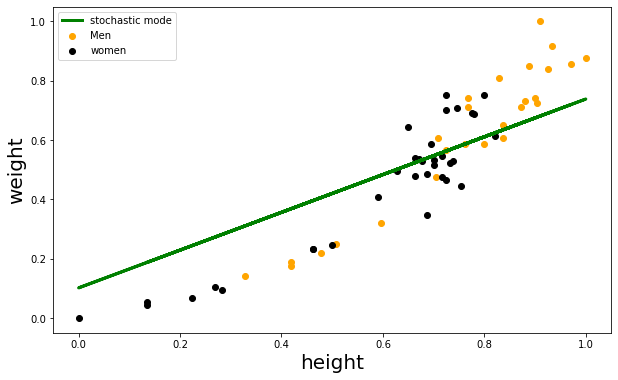

In [15]:
plt.figure(figsize = (10,6))


plt.scatter(Men_data.iloc[:,1],Men_data.iloc[:, 2], color = 'orange',label="Men" )
plt.scatter(Women_data.iloc[:,1],Women_data.iloc[:, 2], color = 'black' , label="women")



plt.plot(Normal_data.iloc[:,1] , y_p , color = 'g' , lw = 3,label="stochastic mode")
plt.xlabel('height' , size = 20)
plt.ylabel('weight', size = 20)
plt.legend()
plt.show()

##  plot the second datasets for stochastic mode

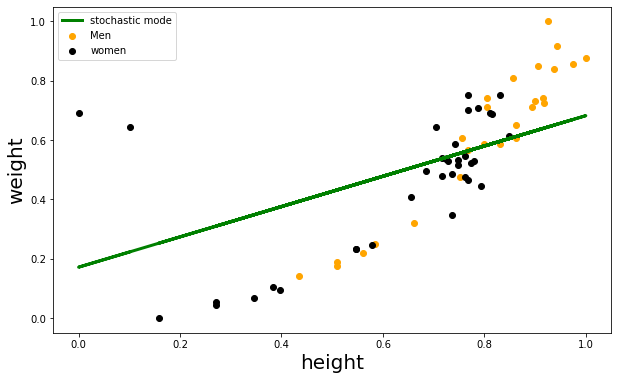

In [23]:
plt.figure(figsize = (10,6))
plt.scatter(Men_data_outlier.iloc[:,1],Men_data_outlier.iloc[:, 2], color = 'orange',label="Men" )
plt.scatter(Women_data_outlier.iloc[:,1],Women_data_outlier.iloc[:, 2], color = 'black' , label="women")
plt.plot(Normal_data_outlier.iloc[:,1] , y_outlier_P , color = 'g' , lw = 3,label="stochastic mode")
plt.xlabel('height' , size = 20)
plt.ylabel('weight', size = 20)
plt.legend()
plt.show()

## obtaine batch gradient descent for regression model 

In [24]:
#for the first dataset..........................................
reg_model2_data1=Linear_Regression_EGD(X,Y)
# epochs is 2000 and Learning rate is 0.1
reg_model2_data1.Fit_Batch(2000,0.01)
y_pred_model2=reg_model2_data1.Predict(X)
#for the second dataset..........................................
reg_model2_data2=Linear_Regression_EGD(X_outlier,Y_outlier)
# epochs is 2000 and Learning rate is 0.1
reg_model2_data2.Fit_Batch(2000,0.01)
y_outlier_Pred=reg_model2_data2.Predict(X_outlier)

### plot the first datasets for Batch mode

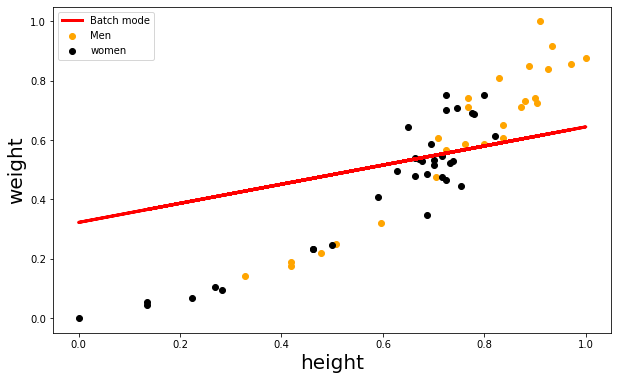

In [25]:
plt.figure(figsize = (10,6))
plt.scatter(Men_data.iloc[:,1],Men_data.iloc[:, 2], color = 'orange',label="Men" )
plt.scatter(Women_data.iloc[:,1],Women_data.iloc[:, 2], color = 'black' , label="women")
plt.plot(Normal_data.iloc[:,1] , y_pred_model2,color = 'r' , lw = 3 , label="Batch mode")
plt.xlabel('height' , size = 20)
plt.ylabel('weight', size = 20)
plt.legend()
plt.show()

## plot the first datasets for Batch mode

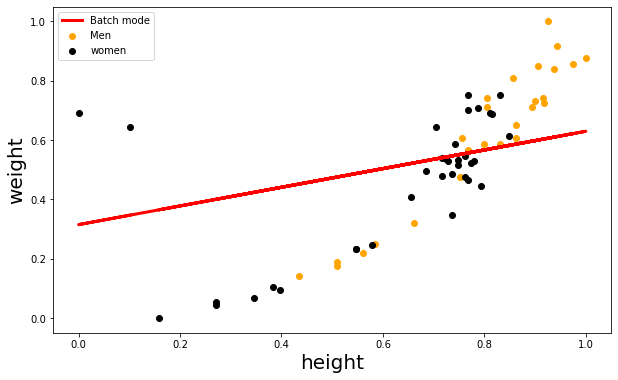

In [26]:
plt.figure(figsize = (10,6))
plt.scatter(Men_data_outlier.iloc[:,1],Men_data_outlier.iloc[:, 2], color = 'orange',label="Men" )
plt.scatter(Women_data_outlier.iloc[:,1],Women_data_outlier.iloc[:, 2], color = 'black' , label="women")
plt.plot(Normal_data_outlier.iloc[:,1] , y_outlier_Pred,color = 'r' , lw = 3 , label="Batch mode")
plt.xlabel('height' , size = 20)
plt.ylabel('weight', size = 20)
plt.legend()
plt.show()